In [1]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
torchvision
matplotlib
"""

# library
# standard library
import os

# third-party library
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import dataloader as dl

In [2]:

# Hyper Parameters
EPOCH = 3               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
LR = 0.001              # learning rate


In [3]:
myset = dl.FaceVisionSet(train=True)
mytest = dl.FaceVisionSet(train = False)
mytest = [(d , l) for d,l in mytest][:300]

In [4]:
print(mytest[0][0].shape)

(1, 96, 96)


In [5]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=myset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = Data.DataLoader(dataset = mytest, batch_size = 200,shuffle=True)

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 96, 96)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 96, 96)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 48, 48)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 48, 48)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 48, 48)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 24, 24)
        )
        self.out = nn.Linear(32 * 24 * 24, 2)   # fully connected layer, output 10 classes
        self.m = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        output =self.m(output)
        return output, x    # return x for visualization



In [9]:
cnn = CNN()
print(cnn)  # net architecture
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=18432, out_features=2, bias=True)
  (m): Softmax()
)


In [10]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.6898 | test accuracy: 0.91


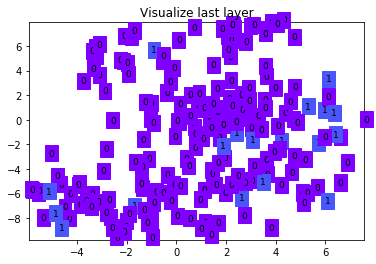

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.91


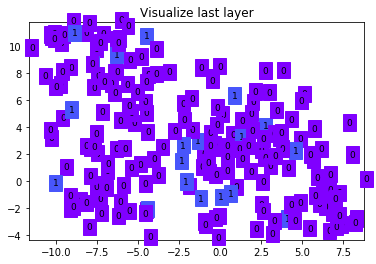

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5476 | test accuracy: 0.90


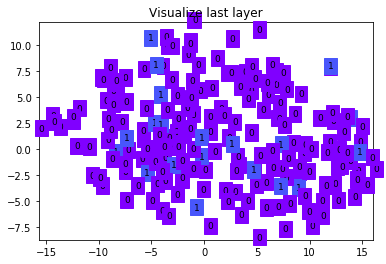

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.91


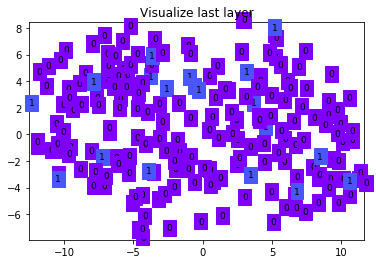

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.93


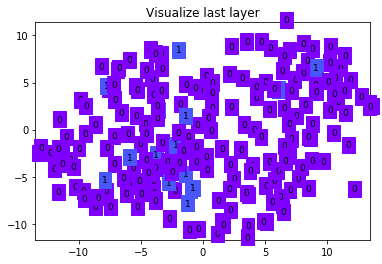

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5476 | test accuracy: 0.90


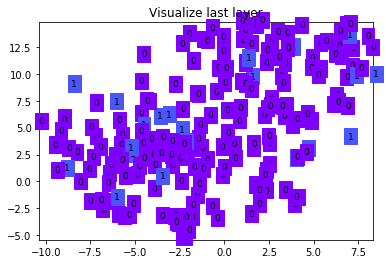

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  0 | train loss: 0.5008 | test accuracy: 0.89


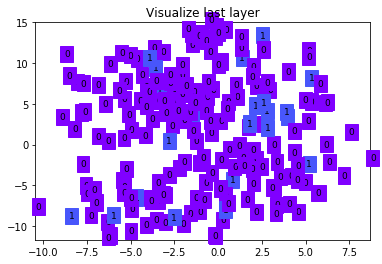

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.4383 | test accuracy: 0.91


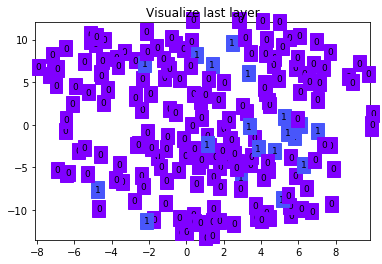

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5008 | test accuracy: 0.91


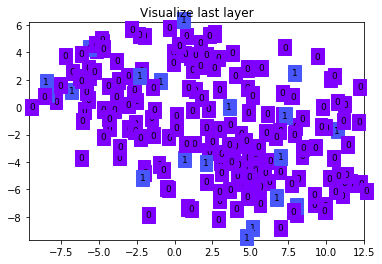

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.4851 | test accuracy: 0.92


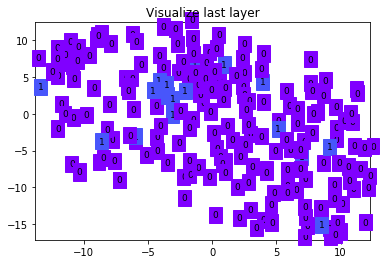

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.4539 | test accuracy: 0.92


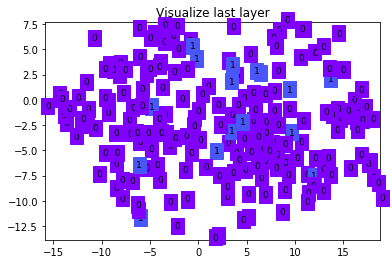

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5164 | test accuracy: 0.93


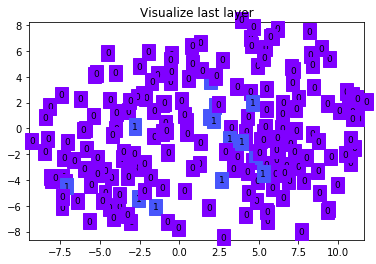

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5320 | test accuracy: 0.94


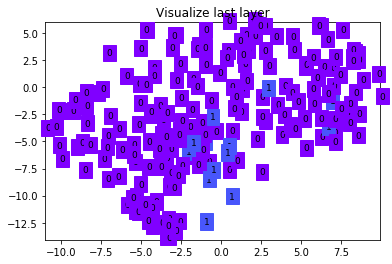

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  1 | train loss: 0.5633 | test accuracy: 0.90


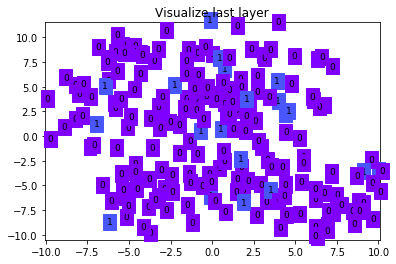

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4539 | test accuracy: 0.90


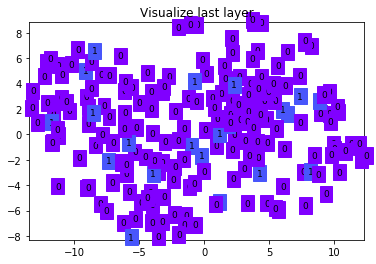

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.5008 | test accuracy: 0.93


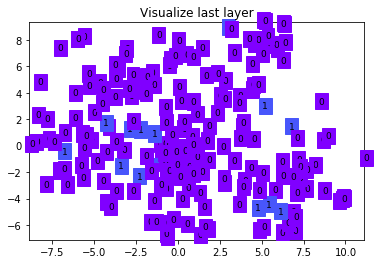

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.5633 | test accuracy: 0.91


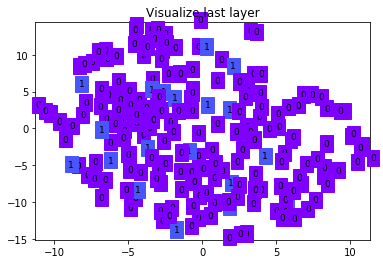

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4695 | test accuracy: 0.91


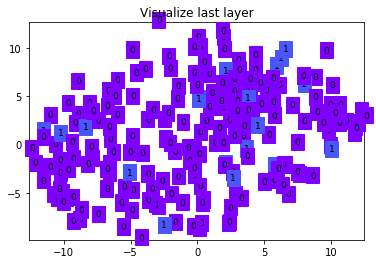

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.5320 | test accuracy: 0.89


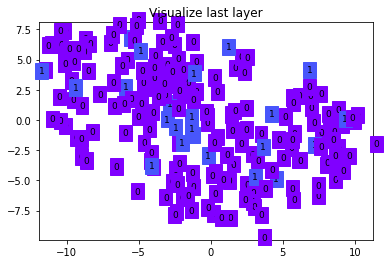

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4695 | test accuracy: 0.89


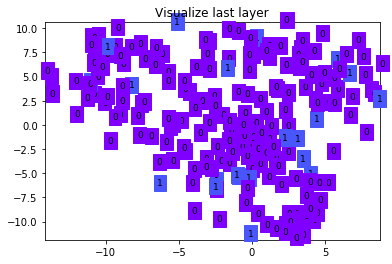

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch:  2 | train loss: 0.4695 | test accuracy: 0.92


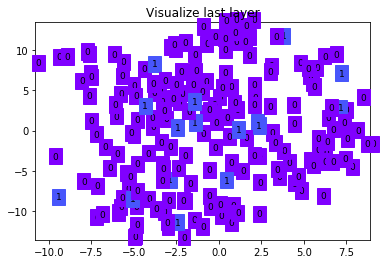

/home/dream/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [11]:

# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
#         print(b_x)
        output = cnn(b_x.float())[0]               # cnn output
#         print(output)
        loss = loss_func(output,b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            for test_x,test_y in test_loader:
                test_output, last_layer = cnn(test_x)
                pred_y = torch.max(test_output, 1)[1].data.numpy()
                accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
                if HAS_SK:
                    # Visualization of trained flatten layer (T-SNE)
                    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                    plot_only = 500
                    low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                    labels = test_y.numpy()[:plot_only]
                    plot_with_labels(low_dim_embs, labels)
                break
plt.ioff()


In [ ]:
for test_x,test_y in test_loader:
    # print 10 predictions from test data
    test_output, _ = cnn(test_x[:10])
    pred_y = torch.max(test_output, 1)[1].data.numpy()
    print(pred_y, 'prediction number')
    print(test_y[:10].numpy(), 'real number')